In [2]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics


In [ ]:
#establishing the connection
conn = psycopg2.connect(
   database="TheMummyProject", user='postgres', password='POSTGRESpencer54321#', host='localhost', port='5432'
)
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("SELECT * from burialmain")

result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.rename(columns={0:'ID', 1:'Square North South',2:'Head Direction',3:'Sex',4:'North South',5:'Depth',6:'East West', 7:'Adult sub Adult', 8:'Face Bundles', 9:'South to Head',10:'Preservation',11:'Field Book Page',12:'Square East West',13:'Goods', 14:'Text', 15:'Wrapping', 16:'Hair Color', 17:'West to Head', 18:'Sample Collected',19:'Area', 20:'Burial ID', 21:'Length',22:'Burial Number', 23:'Data Expert Initials',24:'West to Feet',25:'Age at Death',26:'South to Feet',27:'Excavation Recorder',28:'Photos',29:'Hair',30:'Burial Materials', 31:'Date of Excavation', 32:'Field Book Excavation Year',33:'Cluster Number',34:'Shaft Number' })
df['Square North South'] = df['Square North South'].astype(int)
df['Depth'] = df['Depth'].replace('', pd.np.nan).replace('U',pd.np.nan).astype(float)
df['South to Head'] = df['South to Head'].replace('', pd.np.nan).replace('U',pd.np.nan).astype(float)
df['Square East West'] = df['Square East West'].astype(int)
df['West to Head'] = df['West to Head'].replace('', pd.np.nan).replace('U',pd.np.nan).astype(float)
df['Length'] = df['Length'].replace('', pd.np.nan).replace('N LL',pd.np.nan).astype(float)
df['West to Feet'] = df['West to Feet'].replace('', pd.np.nan).replace('NULL', pd.np.nan).replace('U', pd.np.nan).astype(float)
df['South to Feet'] = df['South to Feet'].replace('NULL', pd.np.nan).replace('U', pd.np.nan).replace('', pd.np.nan).astype(float)
df['Wrapping'] = df['Wrapping'].replace('', "U").replace(pd.np.nan, "U").replace('S', "U")
df['Head Direction'] = df['Head Direction'].replace('N LL', None).replace('', None).replace('I', None)
df['Adult sub Adult'] = df['Adult sub Adult'].replace('N LL', None).replace('', None)

print(df.dtypes)

In [ ]:
from skl2onnx import convert_sklearn 
from skl2onnx.common.data_types import FloatTensorType

k2 = ['Wrapping', 'Head Direction', 'Sample Collected', 'Face Bundles', 'Adult sub Adult']
df2 = df.loc[:,k2]
df2.dropna(inplace=True)
print(df2.shape, '\n')
for col in df2.columns:
  if col != 'Wrapping':
    if not pd.api.types.is_numeric_dtype(df2[col]):
      df2 = pd.get_dummies(df2, columns=[col], prefix=col)

df2
df2 = df2.rename(columns={'Head Direction_W':'Head_Direction_West','Sample Collected_true':'Sample_Collected_True','Face Bundles_Y':'Face_Bundles_Y', 'Adult sub Adult_C':'Adult_Sub_Adult_C', 'Sample Collected_false':'Sample_Collected_False', 'Face Bundles_':'Face_Bundles', 'Adult sub Adult_A':'Adult_sub_Adult_A'})

y = df2.Wrapping # Label
X = df2.drop(columns=['Wrapping']) # Features
X
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
initial_type = [('float_input', FloatTensorType([None, 8]))]
onnx = convert_sklearn(model, initial_types=initial_type)
with open("decision_tree_classifier.onnx", "wb") as f:
    f.write(onnx.SerializeToString())

NameError: name 'df' is not defined

In [ ]:
#df = df.drop(columns=['Sex','Face Bundles', 'Field Book Page', 'Goods', 'Hair Color', 'Burial ID', 'Data Expert Initials', 'Excavation Recorder', 'Photos', 'Hair', 'Burial Materials', 'Date of Excavation', 'Field Book Excavation Year', 'Cluster Number', 'Shaft Number'])
#keepers = ['Wrapping', 'Square North South', 'Square East West', 'Head Direction', 'North South', 'Depth', 'East West', 'Adult sub Adult', 'South to Head', 'Preservation', 'Sample Collected', 'Area', 'West to Feet', 'South to Feet']
k2 = ['Wrapping', 'Head Direction', 'Sample Collected', 'Face Bundles', 'Adult sub Adult']
df2 = df.loc[:,k2]
df2.dropna(inplace=True)
print(df2.shape, '\n')
for col in df2.columns:
  if col != 'Wrapping':
    if not pd.api.types.is_numeric_dtype(df2[col]):
      df2 = pd.get_dummies(df2, columns=[col], drop_first=True)

y = df2.Wrapping # Label
X = df2.drop(columns=['Wrapping']) # Features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
# print(output_df)
print(len(y_pred))

(55, 5) 



,Head Direction_W,Sample Collected_true,Face Bundles_Y,Adult sub Adult_C
31,1,1,1,0
37,1,1,1,0
62,1,1,0,0
79,1,1,1,0
86,1,1,1,0
122,1,1,1,1
133,1,1,1,0
148,1,1,1,0
159,1,1,1,0
161,1,1,1,0


In [ ]:
print(clf)

DecisionTreeClassifier()


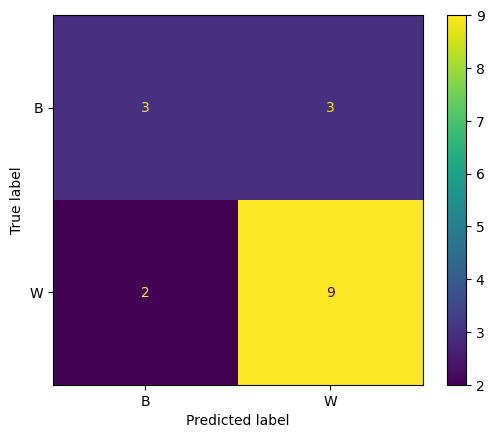

Accuracy: 0.7059


In [ ]:
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns 

cm = metrics.confusion_matrix(y_test, y_pred) # y_pred was calculated in a prior code cell
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['B', 'W'])
cm_display.plot(values_format='d')
plt.show()
print('Accuracy: ' + str(round(clf.score(X_test, y_test),4)))

In [ ]:
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")


Accuracy:	0.7058823529411765


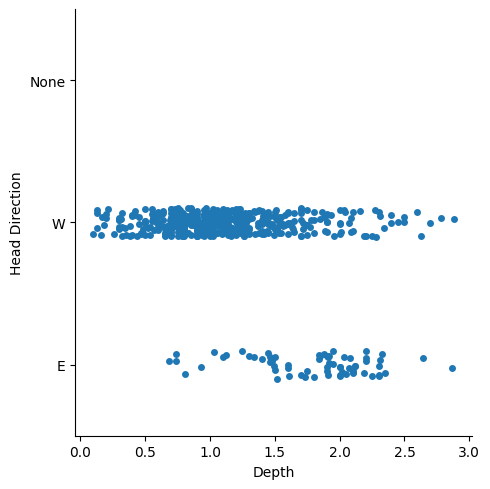

In [ ]:
unsoop = ['Depth', 'Wrapping', 'Head Direction', 'Adult sub Adult']
df_unsuper = df.loc[:,unsoop]

sns.catplot(data=df_unsuper, x="Depth", y="Head Direction")
plt.show()

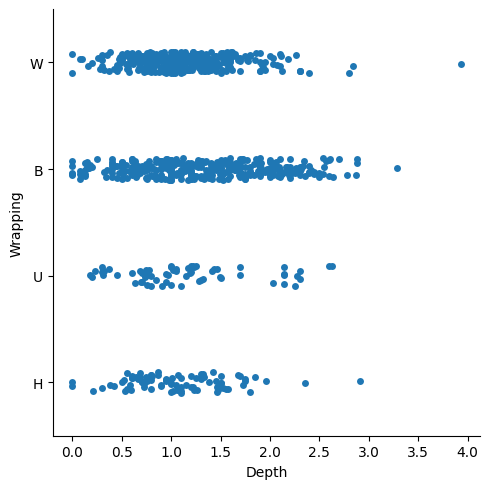

In [ ]:
sns.catplot(data=df_unsuper, x="Depth", y="Wrapping")
plt.show()

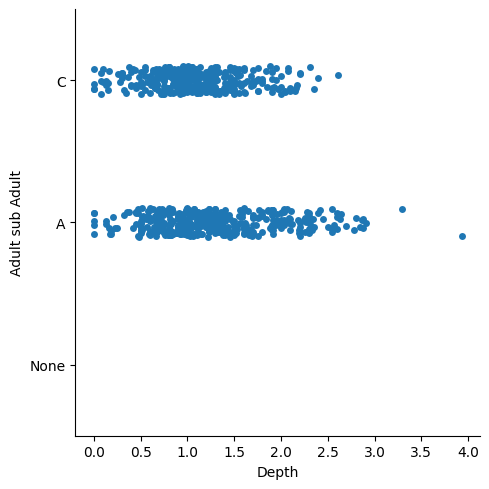

In [ ]:
sns.catplot(data=df_unsuper, x="Depth", y="Adult sub Adult")
plt.show()